# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 손실 곡선

In [ ]:
from tensorflow import keras
# keras import
from sklearn.model_selection import train_test_split
# train_test_split import

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 패션 MNIST 데이터셋 다운로드

train_scaled = train_input / 255.0
# 255로 나눠서 정규화 과정을 거침

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# train_test_split()을 통해 훈련 세트와 검증 세트를 나눔

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    # if문을 추가하여 매개변수 a_layer를 받으면 층을 추가할 수 있음

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()
# model_fn()을 통해서 Sequential() 클래스의 객체를 만듦

model.summary()
# 모델의 summary() 메서드를 호출하여 층에 대한 유용한 정보 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# fit() 메서드의 결과를 history 변수에 담음

In [ ]:
print(history.history.keys())
# history 객체에 history 딕셔너리에 어떤 값이 있는지 확인

dict_keys(['loss', 'accuracy'])


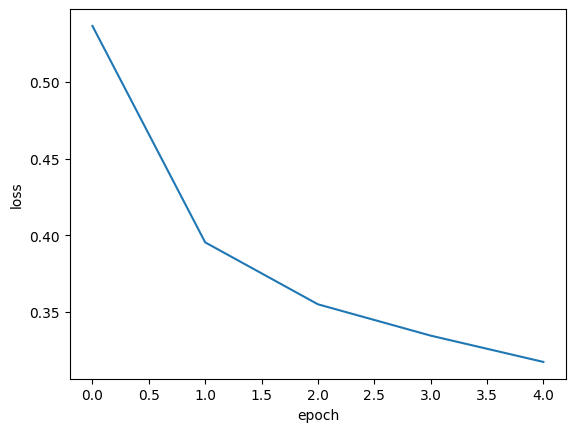

In [ ]:
import matplotlib.pyplot as plt
# pyplot import

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()
# 에포크마다 손실 값을 출력

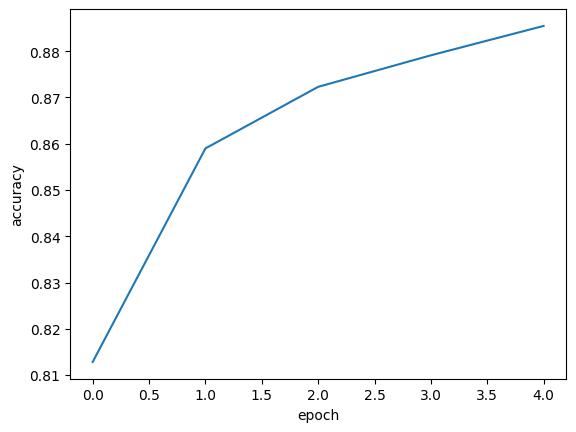

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()
# 에포크마다 정확도 값을 출력

In [ ]:
model = model_fn()
# model_fn()을 통해서 Sequential() 클래스의 객체를 만듦
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
# fit() 메서드의 결과를 history 변수에 담음, 에포크를 20으로 설정

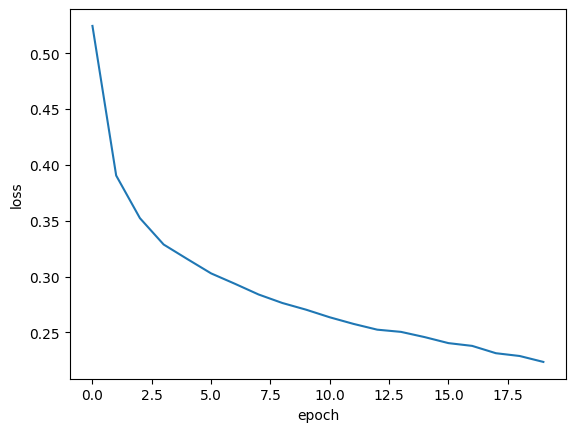

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()
# 에포크마다 손실값을 출력

## 검증 손실

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


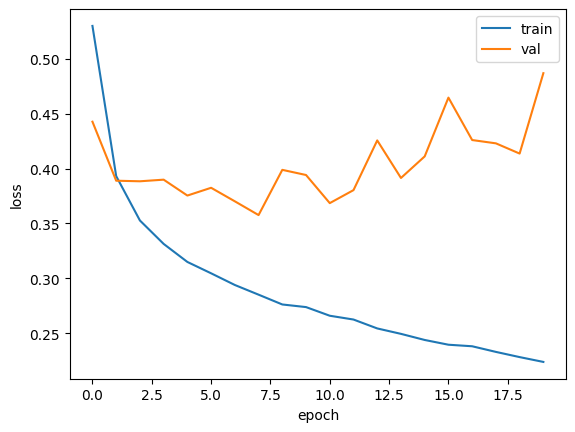

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()
# 훈련 손실과 검증 손실 그래프 출력

In [ ]:
model = model_fn()
# model_fn()을 통해서 Sequential() 클래스의 객체를 만듦
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
# fit() 메서드의 결과를 history 변수에 담음. 에포크를 20으로 설정, validation_data 매개변수에
# 검증에 사용할 입력과 타깃 값을 튜플로 만들어서 전달

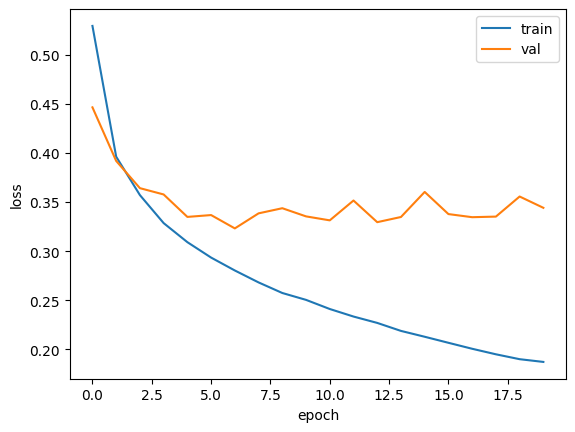

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()
# 훈련 손실과 검증 손실 그래프 출력

## 드롭아웃

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
# model_fn 함수에 Dropout 객체를 전달하여 층을 추가함
# 0.3으로 설정하여 30% 정도으 Dropout을 설정

model.summary()
# 모델의 summary() 메서드를 호출하여 층에 대한 유용한 정보를 출력

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# fit() 메서드의 결과를 history 변수에 담음, 에포크를 20으로 설정, validaton_data 매개변수에
# 검증에 사용할 입력과 타깃값을 튜플로 만들어서 전달

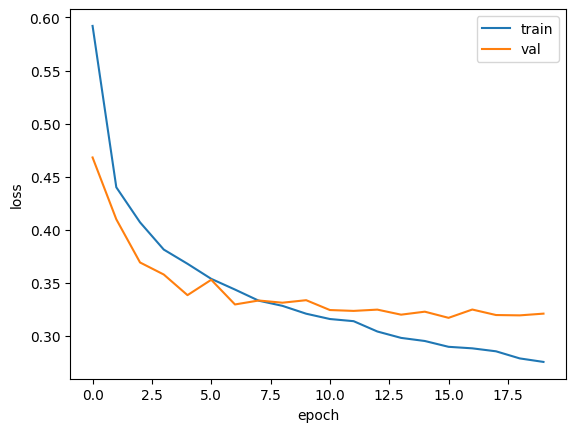

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()
# 훈련 손실과 검증 손실 그래프 출력

## 모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
# model_fn 함수에 Dropout 객체를 전달하여 층을 추가함
# 0.3으로 설정하여 30% 정도의 Dropout을 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
# fit() 메서드의 결과를 history 변수에 담음, 에포크를 10으로 설정, validation_data 매개변수에
# 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

In [ ]:
model.save_weights('model-weights.h5')
# save_weights() 메서드를 통해 훈련된 모델의 파라미터를 저장
# 기본적으로 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장

In [ ]:
model.save('model-whole.h5')
# save() 메서드를 통해 모델 구조와 모델 파라미터를 함께 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls -al *.h5
# 두 파일이 잘 저장되었는지 확인

-rw-r--r-- 1 root root 333320 Nov 29 19:00 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov 29 19:00 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
#model_fn 함수에 Dropout 객체를 전달하여 층을 추가함
#0.3으로 설정하여 30% 정도의 Dropout을 설정

model.load_weights('model-weights.h5')
# load_weights() 메서드를 통해 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽음

In [ ]:
import numpy as np
# numpy import

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 모델에 검증 데이터를 넣은 결과를 numpy 배열로 저장

print(np.mean(val_labels == val_target))
# 정답 데이터와 예측 데이터의 결과의 일치하는 횟수를 평균으로 계산하여 정확도를 출력

375/375 [==============================] - 1s 2ms/step
0.8843333333333333


In [ ]:
model = keras.models.load_model('model-whole.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 전체를 파일에서 읽음

model.evaluate(val_scaled, val_target)
# 검증 세트의 정확도를 출력

375/375 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.8843


[0.3183692395687103, 0.8843333125114441]

## 콜백

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
# model_fn 함수에 Dropout 객체를 전달하여 층을 추가함
# 0.3으로 설정하여 30% 정도의 Dropout을 설정

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
# ModelCheckpoint 클래스의 객체 checkpoint_cb를 만들고 fit()의 callbacks 매개변수에 리스트로 전달
# 그러면 best-model.h5에 최상의 검증 점수를 낸 모델이 저장

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# fit() 메서드의 결과를 history 변수에 담음, 에포크를 10으로 설정, validation_data 매개변수에
# 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달, 콜백함수를 설정함

In [ ]:
model = keras.models.load_model('best-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 전체를 파일에서 읽음

model.evaluate(val_scaled, val_target)
# 검증 세트의 정확도를 출력

375/375 [==============================] - 1s 3ms/step - loss: 0.3245 - accuracy: 0.8833


[0.3245132565498352, 0.8833333253860474]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
# model_fn 함수에 Dropout 객체를 전달하여 층을 추가함
# 0.3으로 설정하여 30% 정도의 Dropout을 설정

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# compile()에 optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
# ModelCheckpoint 클래스의 객체 checkpoint_cb를 만들고 fit()의 callbacks 매개변수에 리스트로 전달
# 그러면 best-model.h5에 최상의 검증 점수를 낸 모델이 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# patience=2로 설정하여 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
# restore_best_weights=True로 설정하여, 훈련을 중지한 후에 현재 모델의 파라미터를 최상의 마라미터로 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# 이전 코드에서 callbacks에 early_stopping_cb를 추가함

In [ ]:
print(early_stopping_cb.stopped_epoch)
# 몇번째 에포크에서 훈련이 중지되었는지 확인
# 에포크 횟수가 0부터 시작하기 때문에 +1 해서 12번째에서 훈련이 중지

10


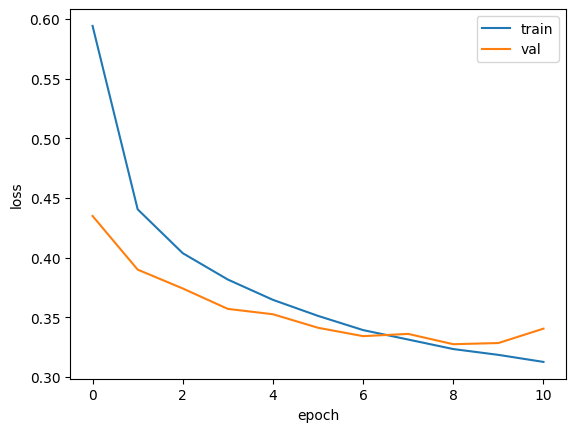

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()
# 훈련 손실과 검증 손실 그래프 출력

In [ ]:
model.evaluate(val_scaled, val_target)
# 조기 종료로 얻은 모델의 검증 세트에 대한 성능 출력

375/375 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8856


[0.32755935192108154, 0.8855833411216736]